In [1]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
MNT_gold_data = pd.read_csv('MNT_zero_shot_gold_equal_length_without_commas_fullstops.csv')
MNT_gold_data.head(10)

,Unnamed: 0,id,token,gold_label
0,0,139661077321344,Northrop,<O>
1,1,139661077320704,Grumman,<O>
2,2,139661077320960,and,<O>
3,3,139661079156672,Airbus,<O>
4,4,139661086389312,parent,<O>
5,5,139661079156352,EADS,<O>
6,6,139661077323840,defeat,<EVENT>
7,7,139661086260992,Boeing,<O>
8,8,139661078350080,for,<O>
9,9,139661084618880,$,<O>


In [3]:
gold_tokens = MNT_gold_data['token']
gold_labels = MNT_gold_data['gold_label']

In [4]:
MNT_predicted_data = pd.read_csv('MNT_zero_shot_predicted_equal_length_without_commas_fullstops.csv')
MNT_predicted_data.head(10)

,Unnamed: 0,id,token,predicted_label
0,0,139661077321344,Northrop,<O>
1,1,139661077320704,Grumman,<O>
2,2,139661077320960,and,<O>
3,3,139661079156672,Airbus,<O>
4,4,139661086389312,parent,<O>
5,5,139661079156352,EADS,<O>
6,6,139661077323840,defeat,<O>
7,7,139661086260992,Boeing,<O>
8,8,139661078350080,for,<O>
9,9,139661084618880,$,<O>


In [5]:
predicted_tokens = MNT_predicted_data['token']
predicted_labels = MNT_predicted_data['predicted_label']

In [6]:
predicted_labels

0        <O>
1        <O>
2        <O>
3        <O>
4        <O>
        ... 
23969    <O>
23970    <O>
23971    <O>
23972    <O>
23973    <O>
Name: predicted_label, Length: 23974, dtype: object

In [7]:
gold_labels.value_counts()

<O>        19958
<EVENT>     4016
Name: gold_label, dtype: int64

In [8]:
predicted_labels.value_counts()

<O>        22303
<EVENT>     1671
Name: predicted_label, dtype: int64

In [9]:
# comparing the LLM's predicted labels to the gold standard
print(classification_report(gold_labels, predicted_labels))

              precision    recall  f1-score   support

     <EVENT>       0.39      0.16      0.23      4016
         <O>       0.85      0.95      0.90     19958

    accuracy                           0.82     23974
   macro avg       0.62      0.55      0.56     23974
weighted avg       0.77      0.82      0.78     23974



In [10]:
x = classification_report(gold_labels, predicted_labels)
with open('eval.txt', 'w', encoding = 'utf8') as outfile:
    outfile.write(x)

In [11]:
with open('eval.txt', encoding = 'utf8') as infile:
    text = infile.read()

In [12]:
print(text)

              precision    recall  f1-score   support

     <EVENT>       0.39      0.16      0.23      4016
         <O>       0.85      0.95      0.90     19958

    accuracy                           0.82     23974
   macro avg       0.62      0.55      0.56     23974
weighted avg       0.77      0.82      0.78     23974



In [13]:
confusion_matrix(gold_labels, predicted_labels)

array([[  646,  3370],
       [ 1025, 18933]], dtype=int64)

In [14]:
data_labels = unique_labels(gold_labels)
print(data_labels)

['<EVENT>' '<O>']


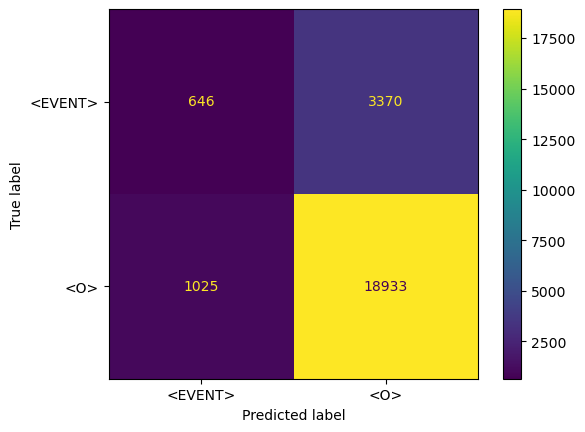

In [15]:
cm = confusion_matrix(gold_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_labels)
disp.plot();

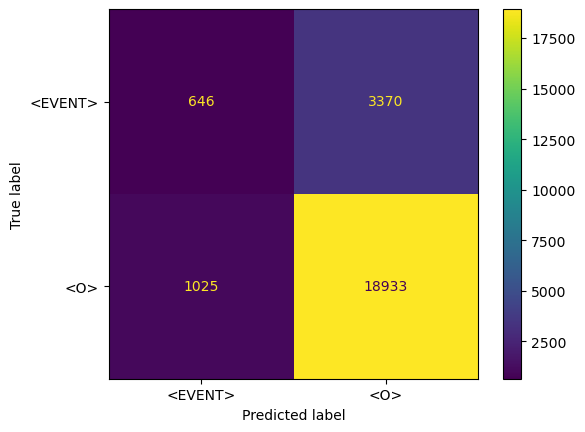

In [16]:
disp.plot().figure_.savefig('confusion_matrix.png')